## Randomly select at least 1000 unique (non-repeat) cities based on latitude and longitude. And perform a weather check on each of the cities using a series of successive API calls

First we'll create a empty set to hold our city names, python sets do not accept duplicate datapoints which means we don't have to check for duplicates later. longitude ranges from -180 to 180 while latitude ranges from -90 to 90. We use the **random** library's **uniform** function to randomly pick pairings of lat and long values to put into the **citipy** function. The outputed *city names* and *country codes* will be inserted into the *set*. These same city name, country code pairs are sent to the OpenWeatherMaps API and if a city's weather report is found, (https status code 200) it'll be stored in the weather list.  We'll put this all under a **while** loop to keep on generating coordinates and cities until we fill up our weather list with 1000 unique values.

In [3]:
from citipy import citipy
from random import uniform # Draw samples from a uniform distribution
import requests
from pprint import pprint
from config import key
url = 'http://api.openweathermap.org/data/2.5/weather?'
cities = list()
weather = list()
duplicate_cities = list()
weatherless_cities = set()
while len(weather) < 1001:
    # generate a 1000 unique latitude and longitude values
    
    long = round(uniform(-180,180), 3) #longitude ranges from -180 to 180
    lat = round(uniform(-90, 90), 3) #latitude ranges from -90 to 90
    #feed into citipy the lat, long coordinates to return as city object
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code
    
    # add the city and it's country code to the cities set
    city_entry = f"{city_name},{country_code}"
    if city_entry not in cities:
        cities.add(city_entry)
        print(f"city generated: {city_entry}")
        payload = url + f"{city}"
        keyed_payload = url + "appid=" + key + "&q=" + city_entry + "?" + "&units=metric"
        print(f"processing request for {payload}")

        response = requests.get(keyed_payload)
        weather_json = response.json()
        print("associated weather data: \n")
        pprint(weather_json)
        if weather_json['cod'] == 200:
            weather.append(weather_json)
        elif weather_json['cod'] == 404:
            weatherless_cities.add(city_entry)
        else:
            pass
    else:
        print(f"duplicate city: {city_entry}")
        duplicate_cities.append(city_entry)
        
    

city generated: thompson,ca
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19BCC128>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 55.74, 'lon': -97.86},
 'dt': 1520398800,
 'id': 6165406,
 'main': {'humidity': 71,
          'pressure': 1025,
          'temp': -14,
          'temp_max': -14,
          'temp_min': -14},
 'name': 'Thompson',
 'sys': {'country': 'CA',
         'id': 3406,
         'message': 0.0033,
         'sunrise': 1520427985,
         'sunset': 1520468359,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 1}}
city generated: castro,cl
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19C23898>
associated weather data: 

{'base': 'sta

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -34.42, 'lon': 19.24},
 'dt': 1520400023,
 'id': 3366880,
 'main': {'grnd_level': 987.68,
          'humidity': 95,
          'pressure': 987.68,
          'sea_level': 1027.13,
          'temp': 17.2,
          'temp_max': 17.2,
          'temp_min': 17.2},
 'name': 'Hermanus',
 'rain': {'3h': 0.305},
 'sys': {'country': 'ZA',
         'message': 0.0038,
         'sunrise': 1520397338,
         'sunset': 1520442708},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 131.501, 'speed': 1.76}}
city generated: longyearbyen,sj
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B158B38>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 78.22, 'lon': 15.63},
 'dt': 1520398200,
 'id': 27

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: thompson,ca
duplicate city: atuona,pf
city generated: verkhnevilyuysk,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B0E84A8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 63.45, 'lon': 120.31},
 'dt': 1520400029,
 'id': 2013639,
 'main': {'grnd_level': 1024.07,
          'humidity': 56,
          'pressure': 1024.07,
          'sea_level': 1042.78,
          'temp': -20.78,
          'temp_max': -20.78,
          'temp_min': -20.78},
 'name': 'Verkhnevilyuysk',
 'sys': {'country': 'RU',
         'message': 0.0029,
         'sunrise': 1520376310,
         'sunset': 1520415351},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 299.501, 'speed': 2.06}}
city generated: samusu,ws
pr

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 33.19, 'lon': -82.53},
 'dt': 1520398500,
 'id': 4231997,
 'main': {'humidity': 100,
          'pressure': 1011,
          'temp': 10.41,
          'temp_max': 13,
          'temp_min': 9},
 'name': 'Avera',
 'sys': {'country': 'US',
         'id': 783,
         'message': 0.0036,
         'sunrise': 1520423428,
         'sunset': 1520465524,
         'type': 1},
 'visibility': 402,
 'weather': [{'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 284.001, 'speed': 3.31}}
duplicate city: mataura,pf
city generated: karaul,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AF55BA8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: anito,ph
processing request for http://api.openwea

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: vaini,to
city generated: taolanaro,mg
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A783160>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: dikson,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AF0BC18>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: ushuaia,ar
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1992E160>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -54.81, 'lon': -68.31},
 'dt': 1520395200,
 'id': 3833367,
 'main': {'humidity': 71,
          'pressure': 988,
          'temp': 11,
          'temp_max': 11,
          'temp_min': 11},
 'name': 'Ushuaia',
 'sys': {'

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: sibolga,id
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A280208>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 1.74, 'lon': 98.78},
 'dt': 1520400047,
 'id': 1213855,
 'main': {'grnd_level': 941.88,
          'humidity': 95,
          'pressure': 941.88,
          'sea_level': 1022.35,
          'temp': 24.48,
          'temp_max': 24.48,
          'temp_min': 24.48},
 'name': 'Sibolga',
 'rain': {'3h': 0.895},
 'sys': {'country': 'ID',
         'message': 0.0037,
         'sunrise': 1520379195,
         'sunset': 1520422714},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 166.001, 'speed': 1.06}}
duplicate city: belushya guba,ru
city generated: ahipara,nz
processing request for htt

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: harper,lr
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A73C048>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 30.3, 'lon': -99.24},
 'dt': 1520398500,
 'id': 4696310,
 'main': {'humidity': 29,
          'pressure': 1024,
          'temp': 10.66,
          'temp_max': 12,
          'temp_min': 10},
 'name': 'Harper',
 'sys': {'country': 'US',
         'id': 2613,
         'message': 0.0035,
         'sunrise': 1520427357,
         'sunset': 1520469611,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 20, 'speed': 3.1}}
duplicate city: kodiak,us
duplicate city: puerto ayora,ec
city generated: tautira,pf
processing request for http://api.openweat

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.14, 'lon': -8.45},
 'dt': 1520398800,
 'id': 2267254,
 'main': {'humidity': 93,
          'pressure': 1011,
          'temp': 7,
          'temp_max': 7,
          'temp_min': 7},
 'name': 'Lagoa',
 'sys': {'country': 'PT',
         'id': 5948,
         'message': 0.0033,
         'sunrise': 1520405781,
         'sunset': 1520447622,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 30, 'speed': 2.1}}
city generated: provideniya,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B04A588>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 64.42, 'lon': -173.23},
 'dt': 1520395200,
 'id': 4031574,
 'main': {'humidity': 68,
          'p

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: atuona,pf
city generated: east london,za
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B6C0390>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
city generated: broome,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19950CF8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 52.47, 'lon': 1.45},
 'dt': 1520398560,
 'id': 2656067,
 'main': {'humidity': 97,
          'pressure': 991,
          'temp': 2.26,
          'temp_max': 4,
          'temp_min': 0},
 'name': 'Broome',
 'sys': {'country': 'GB',
         'id': 5141,
         'message': 0.0042,
         'sunrise': 1520404011,
         'sunset': 1520444665,
         'type': 1},
 'visibility': 250,
 'weather': [{'descript

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.48, 'lon': -54.34},
 'dt': 1520400074,
 'id': 3440777,
 'main': {'grnd_level': 1011.75,
          'humidity': 88,
          'pressure': 1011.75,
          'sea_level': 1028.96,
          'temp': 12.8,
          'temp_max': 12.8,
          'temp_min': 12.8},
 'name': 'Rocha',
 'sys': {'country': 'UY',
         'message': 0.003,
         'sunrise': 1520415006,
         'sunset': 1520460353},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 203.001, 'speed': 3.41}}
city generated: nakuru,ke
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A70D208>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -0.28, 'lon': 36.07},
 'dt': 1520399958,
 'id': 184622,
 'main': {'grnd_level': 8

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: safaqis,tn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B1D7400>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: nanortalik,gl
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A093A20>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: busselton,au
duplicate city: hithadhoo,mv
duplicate city: hilo,us
city generated: yulara,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19968748>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -25.24, 'lon': 130.99},
 'dt': 1520398800,
 'id': 6355222,
 'main': {'humidity': 11,
          'pressure': 1011,
          'temp': 32,
          'temp_max': 32

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 59.7, 'lon': 30.79},
 'dt': 1520397000,
 'id': 546105,
 'main': {'humidity': 61,
          'pressure': 1010,
          'temp': -11,
          'temp_max': -11,
          'temp_min': -11},
 'name': 'Nikolskoye',
 'sys': {'country': 'RU',
         'id': 7267,
         'message': 0.0035,
         'sunrise': 1520397429,
         'sunset': 1520437183,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'speed': 5}}
city generated: marcona,pe
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A9C6B00>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: nabire,id
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 17.54, 'lon': 120.52},
 'dt': 1520395200,
 'id': 1688687,
 'main': {'humidity': 55,
          'pressure': 1011,
          'temp': 33,
          'temp_max': 33,
          'temp_min': 33},
 'name': 'San Quintin',
 'sys': {'country': 'PH',
         'id': 7705,
         'message': 0.003,
         'sunrise': 1520374335,
         'sunset': 1520417154,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 4.1}}
city generated: sao filipe,cv
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19D646A0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: vostok,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 35.74, 'lon': 139.53},
 'dt': 1520398560,
 'id': 1850144,
 'main': {'humidity': 42,
          'pressure': 1034,
          'temp': 6.99,
          'temp_max': 8,
          'temp_min': 6},
 'name': 'Nishihara',
 'sys': {'country': 'JP',
         'id': 7622,
         'message': 0.004,
         'sunrise': 1520370257,
         'sunset': 1520412126,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 2.1}}
city generated: haifa,il
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A2A4D30>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 32.82, 'lon': 35},
 'dt': 1520398200,
 'id': 294801,
 'main': {'humidity': 87,
       

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rocha,uy
duplicate city: illoqqortoormiut,gl
duplicate city: albany,au
city generated: reconquista,ar
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1992AD30>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -29.14, 'lon': -59.64},
 'dt': 1520400106,
 'id': 3429594,
 'main': {'grnd_level': 1025.04,
          'humidity': 59,
          'pressure': 1025.04,
          'sea_level': 1028.75,
          'temp': 16.28,
          'temp_max': 16.28,
          'temp_min': 16.28},
 'name': 'Reconquista',
 'sys': {'country': 'AR',
         'message': 0.0033,
         'sunrise': 1520416453,
         'sunset': 1520461456},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 150.501, 'speed': 5.11}}
duplicate c

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 64.73, 'lon': 177.51},
 'dt': 1520397000,
 'id': 2127202,
 'main': {'humidity': 85,
          'pressure': 1008,
          'temp': -8,
          'temp_max': -8,
          'temp_min': -8},
 'name': 'Anadyr',
 'sys': {'country': 'RU',
         'id': 7238,
         'message': 0.0033,
         'sunrise': 1520362746,
         'sunset': 1520401468,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 300, 'speed': 2}}
duplicate city: kapaa,us
duplicate city: arraial do cabo,br
duplicate city: port alfred,za
city generated: sinnamary,gf
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A089CC0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 5.3

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -8.15, 'lon': 159.59},
 'dt': 1520400116,
 'id': 2109528,
 'main': {'grnd_level': 1006.73,
          'humidity': 98,
          'pressure': 1006.73,
          'sea_level': 1015.7,
          'temp': 27.65,
          'temp_max': 27.65,
          'temp_min': 27.65},
 'name': 'Buala',
 'rain': {'3h': 1.3},
 'sys': {'country': 'SB',
         'message': 0.0031,
         'sunrise': 1520364377,
         'sunset': 1520408339},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 338.501, 'speed': 1.76}}
duplicate city: lebu,cl
city generated: rioblanco,co
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19D10D30>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 3.53, 'lon': -75.64},
 'dt': 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 38.95, 'lon': -92.33},
 'dt': 1520398140,
 'id': 4381982,
 'main': {'humidity': 74,
          'pressure': 1018,
          'temp': 2,
          'temp_max': 2,
          'temp_min': 2},
 'name': 'Columbia',
 'sys': {'country': 'US',
         'id': 1643,
         'message': 0.0043,
         'sunrise': 1520425949,
         'sunset': 1520467713,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'gust': 12.9, 'speed': 7.2}}
duplicate city: esperance,au
city generated: umm kaddadah,sd
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B1379E8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: saskylakh,ru
duplicate city: jamestown,sh
duplicate city

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: rodrigues alves,br
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19B10DA0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -7.74, 'lon': -72.65},
 'dt': 1520395200,
 'id': 3665210,
 'main': {'humidity': 94,
          'pressure': 1013,
          'temp': 23,
          'temp_max': 23,
          'temp_min': 23},
 'name': 'Rodrigues Alves',
 'sys': {'country': 'BR',
         'id': 4485,
         'message': 0.0174,
         'sunrise': 1520420124,
         'sunset': 1520464050,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 300.001, 'speed': 1.06}}
duplicate city: hermanus,za
duplicate city: cape town,za
duplicate city: ponta do sol,cv
duplica

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: torbay,ca
duplicate city: saint-philippe,re
city generated: semnan,ir
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A487FD0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 35.58, 'lon': 53.39},
 'dt': 1520400134,
 'id': 116402,
 'main': {'grnd_level': 897.3,
          'humidity': 68,
          'pressure': 897.3,
          'sea_level': 1028.75,
          'temp': 13.38,
          'temp_max': 13.38,
          'temp_min': 13.38},
 'name': 'Semnan',
 'sys': {'country': 'IR',
         'message': 0.0033,
         'sunrise': 1520390906,
         'sunset': 1520432817},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 206.501, 'speed': 2.96}}
duplicate city: ushuaia,ar
duplicate city: port a

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.74, 'lon': 116.85},
 'dt': 1520400137,
 'id': 6620339,
 'main': {'grnd_level': 1005.11,
          'humidity': 23,
          'pressure': 1005.11,
          'sea_level': 1018.13,
          'temp': 39.78,
          'temp_max': 39.78,
          'temp_min': 39.78},
 'name': 'Karratha',
 'sys': {'country': 'AU',
         'message': 0.0032,
         'sunrise': 1520374321,
         'sunset': 1520418896},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 77.0009, 'speed': 1.96}}
city generated: grande-riviere,ca
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19B8D780>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: punta arenas,cl
duplicate city: chuy,uy
duplicate city: nome,us
city generated: bu

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 22.62, 'lon': 71.45},
 'dt': 1520400143,
 'id': 1256929,
 'main': {'grnd_level': 1015.48,
          'humidity': 20,
          'pressure': 1015.48,
          'sea_level': 1025.23,
          'temp': 30.55,
          'temp_max': 30.55,
          'temp_min': 30.55},
 'name': 'Muli',
 'sys': {'country': 'IN',
         'message': 0.0033,
         'sunrise': 1520386226,
         'sunset': 1520428816},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 68.0009, 'speed': 3.76}}
duplicate city: port alfred,za
city generated: tasiilaq,gl
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A0980B8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: kapaa,us
city generated: kirakira,sb
processing request for htt

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: hilo,us
duplicate city: hasaki,jp
duplicate city: chokurdakh,ru
city generated: gari,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AF24198>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 59.43, 'lon': 62.35},
 'dt': 1520400150,
 'id': 1506676,
 'main': {'grnd_level': 997.49,
          'humidity': 53,
          'pressure': 997.49,
          'sea_level': 1009.5,
          'temp': -13.73,
          'temp_max': -13.73,
          'temp_min': -13.73},
 'name': 'Gari',
 'sys': {'country': 'RU',
         'message': 0.0033,
         'sunrise': 1520389849,
         'sunset': 1520429615},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 289.001, 'speed': 5.31}}
duplicate city: punta are

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 48.64, 'lon': 13.53},
 'dt': 1520398200,
 'id': 3220813,
 'main': {'humidity': 100,
          'pressure': 995,
          'temp': 0,
          'temp_max': 0,
          'temp_min': 0},
 'name': 'Wanning',
 'sys': {'country': 'AT',
         'id': 5932,
         'message': 0.0038,
         'sunrise': 1520400934,
         'sunset': 1520441938,
         'type': 1},
 'visibility': 1200,
 'weather': [{'description': 'light intensity drizzle',
              'icon': '09n',
              'id': 300,
              'main': 'Drizzle'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'speed': 1}}
duplicate city: yellowknife,ca
duplicate city: saldanha,za
city generated: pasni,pk
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AC3FC18>
associated weather data: 

{'base': 'stations',
 'clouds': {'a

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: vaini,to
duplicate city: vaini,to
duplicate city: tsihombe,mg
duplicate city: grand river south east,mu
city generated: stornoway,gb
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A06CAC8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: pevek,ru
duplicate city: illoqqortoormiut,gl
city generated: alice springs,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1994CDA0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -23.7, 'lon': 133.88},
 'dt': 1520398800,
 'id': 2077895,
 'main': {'humidity': 24,
          'pressure': 1009,
          'temp': 33,
          'temp_max': 33,
          'temp_min': 33},
 'name': 'Alice Springs',
 'sys': {'country': 'AU',
         'id': 8163,
         'mes

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.49, 'lon': -4.19},
 'dt': 1520400166,
 'id': 2453348,
 'main': {'grnd_level': 990.6,
          'humidity': 47,
          'pressure': 990.6,
          'sea_level': 1023.85,
          'temp': 22.4,
          'temp_max': 22.4,
          'temp_min': 22.4},
 'name': 'Mopti',
 'sys': {'country': 'ML',
         'message': 0.0042,
         'sunrise': 1520404181,
         'sunset': 1520447155},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 34.5009, 'speed': 5.66}}
duplicate city: bluff,nz
duplicate city: barrow,us
duplicate city: rikitea,pf
duplicate city: baruun-urt,mn
duplicate city: albany,au
duplicate city: norman wells,ca
city generated: le passage,fr
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19FB4A90>
associated weather 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 26.54, 'lon': -77.06},
 'dt': 1520400101,
 'id': 3571913,
 'main': {'grnd_level': 1029.75,
          'humidity': 100,
          'pressure': 1029.75,
          'sea_level': 1029.89,
          'temp': 21.58,
          'temp_max': 21.58,
          'temp_min': 21.58},
 'name': 'Marsh Harbour',
 'sys': {'country': 'BS',
         'message': 0.0039,
         'sunrise': 1520421942,
         'sunset': 1520464378},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 191.001, 'speed': 6.06}}
duplicate city: kruisfontein,za
duplicate city: east london,za
duplicate city: ushuaia,ar
city generated: nara,ml
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A797E80>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: cidreira,br
city generated: constitucion,mx
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A7FF630>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 23.99, 'lon': -104.67},
 'dt': 1520400177,
 'id': 4011743,
 'main': {'grnd_level': 817.78,
          'humidity': 41,
          'pressure': 817.78,
          'sea_level': 1026.36,
          'temp': 11.8,
          'temp_max': 11.8,
          'temp_min': 11.8},
 'name': 'Constitucion',
 'sys': {'country': 'MX',
         'message': 0.005,
         'sunrise': 1520428501,
         'sunset': 1520471066},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 264.501, 'speed': 3.11}}
city generated: kesennuma,jp
processing request for http://api.openweather

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -22.12, 'lon': 14.28},
 'dt': 1520400183,
 'id': 3356832,
 'main': {'grnd_level': 1012.56,
          'humidity': 94,
          'pressure': 1012.56,
          'sea_level': 1025.83,
          'temp': 18.95,
          'temp_max': 18.95,
          'temp_min': 18.95},
 'name': 'Henties Bay',
 'sys': {'country': 'NA',
         'message': 0.0075,
         'sunrise': 1520398907,
         'sunset': 1520443534},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 351.501, 'speed': 1.71}}
city generated: hamilton,bm
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19A1A5C0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 32.3, 'lon': -64.78},
 'dt': 1520394900,
 'id': 3573197,
 'mai

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: vao,nc
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A8E2F98>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 59.1, 'lon': 26.19},
 'dt': 1520400189,
 'id': 588365,
 'main': {'grnd_level': 1014.34,
          'humidity': 88,
          'pressure': 1014.34,
          'sea_level': 1022.51,
          'temp': -6.8,
          'temp_max': -6.8,
          'temp_min': -6.8},
 'name': 'Vao',
 'sys': {'country': 'EE',
         'message': 0.0038,
         'sunrise': 1520398486,
         'sunset': 1520438332},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 104.501, 'speed': 3.61}}
duplicate city: jamestown,sh
duplicate city: hithadhoo,mv
duplicate city: albany,au
duplicate city: isangel,vu
city

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: natal,br
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19ADB320>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -5.81, 'lon': -35.21},
 'dt': 1520398800,
 'id': 3394023,
 'main': {'humidity': 88,
          'pressure': 1011,
          'temp': 26,
          'temp_max': 26,
          'temp_min': 26},
 'name': 'Natal',
 'sys': {'country': 'BR',
         'id': 4546,
         'message': 0.0041,
         'sunrise': 1520411182,
         'sunset': 1520455025,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 2.6}}
city generated: zatyshshya,ua
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City o

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 67.56, 'lon': 30.47},
 'dt': 1520400200,
 'id': 543508,
 'main': {'grnd_level': 1003.81,
          'humidity': 59,
          'pressure': 1003.81,
          'sea_level': 1032.44,
          'temp': -21.58,
          'temp_max': -21.58,
          'temp_min': -21.58},
 'name': 'Kovdor',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1520398276,
         'sunset': 1520436517},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250.501, 'speed': 1.06}}
city generated: pizarro,co
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19D08EF0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 4.95, 'lon': -77.37},
 'dt': 1520400201,
 'id': 3672086,
 'main': {'grnd_le

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: new norfolk,au
duplicate city: roma,au
duplicate city: victoria,sc
city generated: necochea,ar
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1992A2E8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
duplicate city: hilo,us
duplicate city: ribeira grande,pt
duplicate city: provideniya,ru
duplicate city: vaini,to
city generated: doha,kw
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A7197B8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.29, 'lon': 51.53},
 'dt': 1520395200,
 'id': 290030,
 'main': {'humidity': 38,
          'pressure': 1015,
          'temp': 23,
          'temp_max': 23,
          'temp_min': 23},
 'name': 'Doha',
 'sys': {'country': 'QA',
         'id

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 43.2, 'lon': -8.36},
 'dt': 1520398800,
 'id': 3119841,
 'main': {'humidity': 93,
          'pressure': 1007,
          'temp': 4.47,
          'temp_max': 5,
          'temp_min': 4},
 'name': 'Beira',
 'sys': {'country': 'ES',
         'id': 5474,
         'message': 0.0043,
         'sunrise': 1520405963,
         'sunset': 1520447406,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'speed': 2.6}}
duplicate city: ushuaia,ar
city generated: naze,jp
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A57FA58>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 5.43, 'lon': 7.07},
 'dt': 1520398800,
 'id': 2337542,
 'main': {'humid

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: xianyang,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19C96400>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 34.31, 'lon': 108.72},
 'dt': 1520395200,
 'id': 1790353,
 'main': {'humidity': 93,
          'pressure': 1028,
          'temp': 5,
          'temp_max': 5,
          'temp_min': 5},
 'name': 'Xianyang',
 'sys': {'country': 'CN',
         'id': 7433,
         'message': 0.0039,
         'sunrise': 1520377601,
         'sunset': 1520419567,
         'type': 1},
 'visibility': 3000,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 230, 'speed': 5}}
duplicate city: san andres,co
city generated: novopokrovka,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B005

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 23.26, 'lon': 82.56},
 'dt': 1520400220,
 'id': 1277769,
 'main': {'grnd_level': 963.52,
          'humidity': 48,
          'pressure': 963.52,
          'sea_level': 1027.21,
          'temp': 27.28,
          'temp_max': 27.28,
          'temp_min': 27.28},
 'name': 'Baikunthpur',
 'sys': {'country': 'IN',
         'message': 0.0037,
         'sunrise': 1520383577,
         'sunset': 1520426134},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 326.501, 'speed': 2.76}}
city generated: novobiryusinskiy,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AFFD470>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: pottendorf,at
processing request for http://api.openweathermap.org/data/2.5/weath

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 61.14, 'lon': 45.92},
 'dt': 1520400225,
 'id': 479619,
 'main': {'grnd_level': 1009.24,
          'humidity': 78,
          'pressure': 1009.24,
          'sea_level': 1027.78,
          'temp': -14.03,
          'temp_max': -14.03,
          'temp_min': -14.03},
 'name': 'Udimskiy',
 'sys': {'country': 'RU',
         'message': 0.0041,
         'sunrise': 1520393917,
         'sunset': 1520433437},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 298.001, 'speed': 7.01}}
city generated: athabasca,ca
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19B6BFD0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 54.72, 'lon': -113.29},
 'dt': 1520400225,
 'id': 5887916,
 'main': {

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 56.22, 'lon': 88.12},
 'dt': 1520400231,
 'id': 1490591,
 'main': {'grnd_level': 995.54,
          'humidity': 71,
          'pressure': 995.54,
          'sea_level': 1019.71,
          'temp': 0.4,
          'temp_max': 0.4,
          'temp_min': 0.4},
 'name': 'Suslovo',
 'sys': {'country': 'RU',
         'message': 0.0038,
         'sunrise': 1520383458,
         'sunset': 1520423631},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 163.001, 'speed': 2.31}}
duplicate city: mataura,pf
duplicate city: port alfred,za
city generated: hirara,jp
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A554780>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: bitung,id
processing request for ht

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -32.81, 'lon': -56.52},
 'dt': 1520400237,
 'id': 3441273,
 'main': {'grnd_level': 1019.29,
          'humidity': 81,
          'pressure': 1019.29,
          'sea_level': 1030.13,
          'temp': 12.7,
          'temp_max': 12.7,
          'temp_min': 12.7},
 'name': 'Paso de los Toros',
 'sys': {'country': 'UY',
         'message': 0.0036,
         'sunrise': 1520415586,
         'sunset': 1520460820},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 186.501, 'speed': 1.86}}
duplicate city: karratha,au
duplicate city: hithadhoo,mv
duplicate city: sorland,no
city generated: berlevag,no
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A940588>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 10.93, 'lon': 108.1},
 'dt': 1520400242,
 'id': 1571058,
 'main': {'grnd_level': 1017.59,
          'humidity': 73,
          'pressure': 1017.59,
          'sea_level': 1023.44,
          'temp': 29.55,
          'temp_max': 29.55,
          'temp_min': 29.55},
 'name': 'Phan Thiet',
 'sys': {'country': 'VN',
         'message': 0.0037,
         'sunrise': 1520377163,
         'sunset': 1520420280},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 86.0009, 'speed': 7.01}}
duplicate city: belushya guba,ru
duplicate city: port alfred,za
duplicate city: kapaa,us
duplicate city: kaitangata,nz
city generated: tuggurt,dz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19EDE390>
associated weather data: 

{'cod': '404', 'message': 'cit

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.68, 'lon': -59.66},
 'dt': 1520400249,
 'id': 3428576,
 'main': {'grnd_level': 1029.91,
          'humidity': 94,
          'pressure': 1029.91,
          'sea_level': 1030.82,
          'temp': 13.73,
          'temp_max': 13.73,
          'temp_min': 13.73},
 'name': 'San Pedro',
 'sys': {'country': 'AR',
         'message': 0.0039,
         'sunrise': 1520416311,
         'sunset': 1520461602},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 57.0009, 'speed': 1.61}}
city generated: biltine,td
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B199828>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.53, 'lon': 20.93},
 'dt': 1520400249,
 'id': 244878,
 'main': {'grnd_l

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: new norfolk,au
duplicate city: rikitea,pf
city generated: semey,kz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A725898>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 50.41, 'lon': 80.25},
 'dt': 1520400254,
 'id': 1519422,
 'main': {'grnd_level': 997.24,
          'humidity': 89,
          'pressure': 997.24,
          'sea_level': 1030.13,
          'temp': 0.4,
          'temp_max': 0.4,
          'temp_min': 0.4},
 'name': 'Semey',
 'sys': {'country': 'KZ',
         'message': 0.0035,
         'sunrise': 1520385025,
         'sunset': 1520425829},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 266.001, 'speed': 6.41}}
duplicate city: hilo,us
duplicate city: makakilo city,

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -34.85, 'lon': 139.16},
 'dt': 1520398800,
 'id': 2067070,
 'main': {'humidity': 35,
          'pressure': 1017,
          'temp': 31,
          'temp_max': 31,
          'temp_min': 31},
 'name': 'Palmer',
 'sys': {'country': 'AU',
         'id': 8204,
         'message': 0.0037,
         'sunrise': 1520368525,
         'sunset': 1520413968,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 6.2}}
duplicate city: bambous virieux,mu
duplicate city: illoqqortoormiut,gl
duplicate city: kavieng,pg
duplicate city: nikolskoye,ru
city generated: black river,jm
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A539438>
associated weather data: 

{'base': 'stations',
 'clouds

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 5.27, 'lon': -3.6},
 'dt': 1520398800,
 'id': 2291087,
 'main': {'humidity': 88,
          'pressure': 1010,
          'temp': 27,
          'temp_max': 27,
          'temp_min': 27},
 'name': 'Bonoua',
 'sys': {'country': 'CI',
         'id': 6267,
         'message': 0.004,
         'sunrise': 1520403838,
         'sunset': 1520447208,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 1.5}}
city generated: polunochnoye,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B03D5C0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 60.87, 'lon': 60.43},
 'dt': 1520400265,
 'id': 1494482,
 'main': {'grnd_level': 991.

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: dikson,ru
duplicate city: bluff,nz
city generated: mpika,zm
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B6DD7F0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -11.84, 'lon': 31.4},
 'dt': 1520400270,
 'id': 905846,
 'main': {'grnd_level': 871.19,
          'humidity': 100,
          'pressure': 871.19,
          'sea_level': 1024.78,
          'temp': 18.58,
          'temp_max': 18.58,
          'temp_min': 18.58},
 'name': 'Mpika',
 'sys': {'country': 'ZM',
         'message': 0.0036,
         'sunrise': 1520395057,
         'sunset': 1520439177},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 151.001, 'speed': 1.36}}
duplicate city: bredasdorp,za
city generated: waingapu,

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: axim,gh
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A08B780>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 4.87, 'lon': -2.24},
 'dt': 1520400275,
 'id': 2303611,
 'main': {'grnd_level': 1021.56,
          'humidity': 100,
          'pressure': 1021.56,
          'sea_level': 1023.89,
          'temp': 27.03,
          'temp_max': 27.03,
          'temp_min': 27.03},
 'name': 'Axim',
 'sys': {'country': 'GH',
         'message': 0.0032,
         'sunrise': 1520403503,
         'sunset': 1520446890},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 197.001, 'speed': 4.36}}
duplicate city: rikitea,pf
city generated: catalao,br
processing request for http://api.openweathermap.org/data/2.

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: albany,au
city generated: asau,tv
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B203F98>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: gamba,ga
city generated: mincivan,az
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1996E710>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: roebourne,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19962DD8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.77, 'lon': 117.15},
 'dt': 1520400281,
 'id': 2062276,
 'main': {'grnd_level': 1005.11,
          'humidity': 23,
          'pressure': 1005.11,
          'sea_level': 1018.13,
          't

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 36.67, 'lon': 68.84},
 'dt': 1520400287,
 'id': 1135690,
 'main': {'grnd_level': 947.8,
          'humidity': 77,
          'pressure': 947.8,
          'sea_level': 1036.13,
          'temp': 13.68,
          'temp_max': 13.68,
          'temp_min': 13.68},
 'name': 'Isa Khel',
 'rain': {'3h': 0.115},
 'sys': {'country': 'AF',
         'message': 0.0034,
         'sunrise': 1520387235,
         'sunset': 1520429075},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 0.500946, 'speed': 1.46}}
duplicate city: upernavik,gl
duplicate city: katsuura,jp
city generated: saharanpur,in
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A41B320>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 50.53, 'lon': 42.67},
 'dt': 1520400292,
 'id': 519062,
 'main': {'grnd_level': 1016.37,
          'humidity': 84,
          'pressure': 1016.37,
          'sea_level': 1032.6,
          'temp': -11.58,
          'temp_max': -11.58,
          'temp_min': -11.58},
 'name': 'Novoanninskiy',
 'sys': {'country': 'RU',
         'message': 0.0088,
         'sunrise': 1520394037,
         'sunset': 1520434853},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 129.501, 'speed': 6.01}}
duplicate city: acapulco,mx
duplicate city: kirakira,sb
duplicate city: cabo san lucas,mx
city generated: dudinka,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AF15E80>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'co

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.44, 'lon': 55.67},
 'dt': 1520400296,
 'id': 114259,
 'main': {'grnd_level': 824.83,
          'humidity': 41,
          'pressure': 824.83,
          'sea_level': 1027.29,
          'temp': 14.48,
          'temp_max': 14.48,
          'temp_min': 14.48},
 'name': 'Sirjan',
 'sys': {'country': 'IR',
         'message': 0.0033,
         'sunrise': 1520390185,
         'sunset': 1520432438},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 121.501, 'speed': 1.71}}
duplicate city: hermanus,za
city generated: aksarka,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AEAFE10>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: tiksi,ru
city generated: pontiac,us
processing request for http://ap

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -0.92, 'lon': 100.36},
 'dt': 1520400302,
 'id': 1633419,
 'main': {'grnd_level': 1017.51,
          'humidity': 100,
          'pressure': 1017.51,
          'sea_level': 1022.88,
          'temp': 26.13,
          'temp_max': 26.13,
          'temp_min': 26.13},
 'name': 'Padang',
 'sys': {'country': 'ID',
         'message': 0.0036,
         'sunrise': 1520378757,
         'sunset': 1520422391},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 175.501, 'speed': 2.36}}
city generated: nelson bay,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1995EDA0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -32.72, 'lon': 152.14},
 'dt': 1520398800,
 'id': 2155562,
 'main'

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: marzuq,ly
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A76EC88>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.4, 'lon': 46.47},
 'dt': 1520400307,
 'id': 72181,
 'main': {'grnd_level': 869.41,
          'humidity': 24,
          'pressure': 869.41,
          'sea_level': 1029.97,
          'temp': 21.55,
          'temp_max': 21.55,
          'temp_min': 21.55},
 'name': 'Marzuq',
 'sys': {'country': 'YE',
         'message': 0.0042,
         'sunrise': 1520392026,
         'sunset': 1520434998},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 325.501, 'speed': 1.51}}
duplicate city: illoqqortoormiut,gl
duplicate city: illoqqortoormiut,gl
duplicate city: punta arenas,cl
duplicate c

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 10.62, 'lon': 104.18},
 'dt': 1520400312,
 'id': 1831112,
 'main': {'grnd_level': 1014.02,
          'humidity': 73,
          'pressure': 1014.02,
          'sea_level': 1023.4,
          'temp': 31.23,
          'temp_max': 31.23,
          'temp_min': 31.23},
 'name': 'Kampot',
 'sys': {'country': 'KH',
         'message': 0.0028,
         'sunrise': 1520378097,
         'sunset': 1520421228},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 116.501, 'speed': 1.96}}
city generated: canals,es
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19F1EC18>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 38.96, 'lon': -0.58},
 'dt': 1520398800,
 'id': 2520320,
 'main': {'humidity': 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -22.82, 'lon': 47.32},
 'dt': 1520400317,
 'id': 1053507,
 'main': {'grnd_level': 993.43,
          'humidity': 89,
          'pressure': 993.43,
          'sea_level': 1020.36,
          'temp': 26.45,
          'temp_max': 26.45,
          'temp_min': 26.45},
 'name': 'Vondrozo',
 'sys': {'country': 'MG',
         'message': 0.0034,
         'sunrise': 1520390956,
         'sunset': 1520435627},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 246.001, 'speed': 0.86}}
duplicate city: ushuaia,ar
duplicate city: jamestown,sh
duplicate city: severo-kurilsk,ru
city generated: campbell river,ca
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19B76D68>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city genera

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 47.84, 'lon': 13.25},
 'dt': 1520398200,
 'id': 2763749,
 'main': {'humidity': 93,
          'pressure': 995,
          'temp': 2,
          'temp_max': 2,
          'temp_min': 2},
 'name': 'Thalgau',
 'sys': {'country': 'AT',
         'id': 5933,
         'message': 0.004,
         'sunrise': 1520400966,
         'sunset': 1520442039,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 3.6}}
duplicate city: ushuaia,ar
duplicate city: atuona,pf
duplicate city: chokurdakh,ru
duplicate city: port lincoln,au
duplicate city: sentyabrskiy,ru
city generated: langarud,ir
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A482278>
associated weather data: 

{'base': 'stations',
 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 61.92, 'lon': 159.24},
 'dt': 1520400328,
 'id': 2125693,
 'main': {'grnd_level': 1002.03,
          'humidity': 96,
          'pressure': 1002.03,
          'sea_level': 1010.88,
          'temp': -5.73,
          'temp_max': -5.73,
          'temp_min': -5.73},
 'name': 'Evensk',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1520366846,
         'sunset': 1520406126},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 30.5009, 'speed': 7.21}}
duplicate city: barrow,us
duplicate city: cabo san lucas,mx
duplicate city: kahului,us
city generated: atbasar,kz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A71B978>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 33.63, 'lon': 130.94},
 'dt': 1520397000,
 'id': 1848087,
 'main': {'humidity': 47,
          'pressure': 1022,
          'temp': 11.52,
          'temp_max': 15,
          'temp_min': 10},
 'name': 'Miyako',
 'sys': {'country': 'JP',
         'id': 7546,
         'message': 0.005,
         'sunrise': 1520372253,
         'sunset': 1520414251,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 20, 'speed': 2.1}}
city generated: waitati,nz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A98E940>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -45.75, 'lon': 170.57},
 'dt': 1520400333,
 'id': 2179825,
 'main': {'grnd_level': 990.51,
   

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.39, 'lon': -105.62},
 'dt': 1520400338,
 'id': 3996234,
 'main': {'grnd_level': 884.25,
          'humidity': 23,
          'pressure': 884.25,
          'sea_level': 1032.16,
          'temp': 10.65,
          'temp_max': 10.65,
          'temp_min': 10.65},
 'name': 'Lazaro Cardenas',
 'sys': {'country': 'MX',
         'message': 0.0034,
         'sunrise': 1520428837,
         'sunset': 1520471190},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 46.5009, 'speed': 3.91}}
duplicate city: mataura,pf
city generated: ashdod,il
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A2A2E48>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 31.8, 'lon': 34.65},
 'dt': 1520398200,
 '

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: tuktoyaktuk,ca
duplicate city: amderma,ru
duplicate city: samusu,ws
duplicate city: attawapiskat,ca
city generated: igunga,tz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B218128>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -4.28, 'lon': 33.88},
 'dt': 1520400343,
 'id': 159386,
 'main': {'grnd_level': 899.4,
          'humidity': 100,
          'pressure': 899.4,
          'sea_level': 1025.83,
          'temp': 18.3,
          'temp_max': 18.3,
          'temp_min': 18.3},
 'name': 'Igunga',
 'sys': {'country': 'TZ',
         'message': 0.0039,
         'sunrise': 1520394635,
         'sunset': 1520438415},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 46.0009, 'speed': 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 36.85, 'lon': -76.29},
 'dt': 1520398740,
 'id': 4776222,
 'main': {'humidity': 93,
          'pressure': 1008,
          'temp': 6.77,
          'temp_max': 9,
          'temp_min': 6},
 'name': 'Norfolk',
 'sys': {'country': 'US',
         'id': 2865,
         'message': 0.0042,
         'sunrise': 1520422038,
         'sunset': 1520463923,
         'type': 1},
 'visibility': 9656,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'},
             {'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 130, 'speed': 4.1}}
city generated: bowen,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF199509E8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.01, 'lon'

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -4.94, 'lon': 122.53},
 'dt': 1520400354,
 'id': 1640972,
 'main': {'grnd_level': 1016.61,
          'humidity': 100,
          'pressure': 1016.61,
          'sea_level': 1019.76,
          'temp': 28.55,
          'temp_max': 28.55,
          'temp_min': 28.55},
 'name': 'Katobu',
 'rain': {'3h': 2.045},
 'sys': {'country': 'ID',
         'message': 0.0036,
         'sunrise': 1520373346,
         'sunset': 1520417159},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 276.001, 'speed': 2.51}}
duplicate city: iqaluit,ca
duplicate city: kaitangata,nz
city generated: sola,vu
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B6AE6D8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.14, 'lon': 67.45},
 'dt': 1520400361,
 'id': 1174451,
 'main': {'grnd_level': 1025.94,
          'humidity': 84,
          'pressure': 1025.94,
          'sea_level': 1026,
          'temp': 26.55,
          'temp_max': 26.55,
          'temp_min': 26.55},
 'name': 'Keti Bandar',
 'sys': {'country': 'PK',
         'message': 0.0095,
         'sunrise': 1520387223,
         'sunset': 1520429741},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0.500946, 'speed': 1.86}}
duplicate city: saint-philippe,re
duplicate city: yialos,gr
duplicate city: butaritari,ki
duplicate city: cherskiy,ru
city generated: witu,ke
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A710A90>
associated weather data: 

{'base': 'stations',
 'clouds': {'a

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: ciudad bolivar,ve
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B696C88>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: harlingen,nl
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A91D080>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 26.19, 'lon': -97.7},
 'dt': 1520398500,
 'id': 4696233,
 'main': {'humidity': 87,
          'pressure': 1021,
          'temp': 15.51,
          'temp_max': 18,
          'temp_min': 14},
 'name': 'Harlingen',
 'sys': {'country': 'US',
         'id': 2629,
         'message': 0.0035,
         'sunrise': 1520426883,
         'sunset': 1520469342,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
            

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 40.36, 'lon': -7.35},
 'dt': 1520400372,
 'id': 8010472,
 'main': {'grnd_level': 956.71,
          'humidity': 96,
          'pressure': 956.71,
          'sea_level': 1025.96,
          'temp': -1.3,
          'temp_max': -1.3,
          'temp_min': -1.3},
 'name': 'Belmonte',
 'sys': {'country': 'PT',
         'message': 0.0053,
         'sunrise': 1520405621,
         'sunset': 1520447259},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 230.501, 'speed': 0.96}}
duplicate city: hermanus,za
duplicate city: hovd,mn
duplicate city: poum,nc
duplicate city: illoqqortoormiut,gl
city generated: cordoba,ar
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19927198>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 5

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.96, 'lon': -120.06},
 'dt': 1520398500,
 'id': 5369568,
 'main': {'humidity': 66,
          'pressure': 1018,
          'temp': 12.17,
          'temp_max': 15,
          'temp_min': 9},
 'name': 'Madera',
 'sys': {'country': 'US',
         'id': 418,
         'message': 0.0037,
         'sunrise': 1520432535,
         'sunset': 1520474432,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 65.0009, 'speed': 1.16}}
duplicate city: ushuaia,ar
city generated: lima,pe
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A9C6438>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -12.06, 'lon': -77.04},
 'dt': 1520400296,
 'id': 3936456,
 'mai

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 37.47, 'lon': -105.87},
 'dt': 1520399100,
 'id': 5411479,
 'main': {'humidity': 29,
          'pressure': 1024,
          'temp': -5.46,
          'temp_max': -5,
          'temp_min': -6},
 'name': 'Alamosa',
 'sys': {'country': 'US',
         'id': 534,
         'message': 0.0034,
         'sunrise': 1520429149,
         'sunset': 1520471009,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 246.501, 'speed': 1.21}}
duplicate city: hilo,us
duplicate city: vaini,to
duplicate city: sola,vu
duplicate city: norman wells,ca
duplicate city: avarua,ck
duplicate city: ushuaia,ar
duplicate city: sao filipe,cv
duplicate city: jamestown,sh
duplicate city: cape town,za
duplicate city: cape town,za
city generated: deogarh,in
processing request for http://api.

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 36.74, 'lon': -119.78},
 'dt': 1520398560,
 'id': 5350937,
 'main': {'humidity': 44,
          'pressure': 1018,
          'temp': 11.8,
          'temp_max': 15,
          'temp_min': 9},
 'name': 'Fresno',
 'sys': {'country': 'US',
         'id': 389,
         'message': 0.0048,
         'sunrise': 1520432462,
         'sunset': 1520474371,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 50, 'speed': 2.1}}
duplicate city: busselton,au
duplicate city: saldanha,za
duplicate city: bredasdorp,za
duplicate city: port alfred,za
duplicate city: mys shmidta,ru
duplicate city: bilma,ne
duplicate city: barentsburg,sj
city generated: tilichiki,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 43.23, 'lon': 21.59},
 'dt': 1520398800,
 'id': 786690,
 'main': {'humidity': 61,
          'pressure': 1000,
          'temp': 10,
          'temp_max': 10,
          'temp_min': 10},
 'name': 'Prokuplje',
 'sys': {'country': 'RS',
         'id': 5973,
         'message': 0.0034,
         'sunrise': 1520398784,
         'sunset': 1520440211,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 2.6}}
city generated: xinpu,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19C99588>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 24.83, 'lon': 121.07},
 'dt': 1520397000,
 'id': 1675151,
 'main': {'humidity': 77,
         

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: pisco,pe
city generated: bull savanna,jm
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A5394E0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: beringovskiy,ru
city generated: pueblo nuevo,pe
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A9D01D0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 23.99, 'lon': -106.96},
 'dt': 1520400193,
 'id': 4002745,
 'main': {'grnd_level': 1006.56,
          'humidity': 69,
          'pressure': 1006.56,
          'sea_level': 1025.59,
          'temp': 18.13,
          'temp_max': 18.13,
          'temp_min': 18.13},
 'name': 'Pueblo Nuevo',
 'sys': {'country': 'MX',
         'message': 0.0033,
         'sunrise': 1520429050,
         'sunset': 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 63.92, 'lon': 127.47},
 'dt': 1520400400,
 'id': 2017215,
 'main': {'grnd_level': 1007.46,
          'humidity': 54,
          'pressure': 1007.46,
          'sea_level': 1039.21,
          'temp': -23.85,
          'temp_max': -23.85,
          'temp_min': -23.85},
 'name': 'Sangar',
 'sys': {'country': 'RU',
         'message': 0.0075,
         'sunrise': 1520374641,
         'sunset': 1520413585},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 284.001, 'speed': 2.11}}
duplicate city: jamestown,sh
duplicate city: georgetown,sh
duplicate city: qaanaaq,gl
duplicate city: taolanaro,mg
city generated: lidkoping,se
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B13F400>
associated weather data: 

{'cod': '404', 'message': 'city 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 21.05, 'lon': -89.07},
 'dt': 1520398140,
 'id': 3526662,
 'main': {'humidity': 78,
          'pressure': 1015,
          'temp': 24,
          'temp_max': 24,
          'temp_min': 24},
 'name': 'Teya',
 'sys': {'country': 'MX',
         'id': 3996,
         'message': 0.0031,
         'sunrise': 1520424691,
         'sunset': 1520467387,
         'type': 1},
 'visibility': 11265,
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 142.001, 'speed': 2.96}}
duplicate city: husavik,is
duplicate city: qasigiannguit,gl
duplicate city: ushuaia,ar
duplicate city: kapaa,us
duplicate city: bethel,us
duplicate city: meulaboh,id
duplicate city: butaritari,ki
duplicate city: hilo,us
duplicate city: kodiak,us
duplicate city: bluff,nz
duplicate city: provideniya,ru
duplicate city: rikitea,pf
duplicate cit

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.67, 'lon': 54.14},
 'dt': 1520398800,
 'id': 133595,
 'main': {'humidity': 59,
          'pressure': 1017,
          'temp': 17,
          'temp_max': 17,
          'temp_min': 17},
 'name': 'Gerash',
 'sys': {'country': 'IR',
         'id': 7079,
         'message': 0.0037,
         'sunrise': 1520390505,
         'sunset': 1520432850,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 2.1}}
duplicate city: busselton,au
city generated: sangerhausen,de
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19E6EE10>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 51.47, 'lon': 11.3},
 'dt': 1520398200,
 'id': 2841693,
 'main'

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: cidreira,br
city generated: coahuayana,mx
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A7F8A90>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.62, 'lon': -100.35},
 'dt': 1520400413,
 'id': 3981460,
 'main': {'grnd_level': 901.59,
          'humidity': 75,
          'pressure': 901.59,
          'sea_level': 1023.77,
          'temp': 15.18,
          'temp_max': 15.18,
          'temp_min': 15.18},
 'name': 'Coahuayana',
 'sys': {'country': 'MX',
         'message': 0.0042,
         'sunrise': 1520427341,
         'sunset': 1520470148},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 256.501, 'speed': 0.86}}
duplicate city: cape town,za
duplicate city: taltal,cl
duplicate city: blu

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: buqayq,sa
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B12F5F8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
duplicate city: carnarvon,au
city generated: trincomalee,lk
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A737860>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 8.58, 'lon': 81.23},
 'dt': 1520400418,
 'id': 1226260,
 'main': {'grnd_level': 1017.51,
          'humidity': 69,
          'pressure': 1017.51,
          'sea_level': 1024.78,
          'temp': 30.15,
          'temp_max': 30.15,
          'temp_min': 30.15},
 'name': 'Trincomalee',
 'sys': {'country': 'LK',
         'message': 0.0037,
         'sunrise': 1520383557,
         'sunset': 1520426780}

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 44.36, 'lon': -98.21},
 'dt': 1520398500,
 'id': 5228673,
 'main': {'humidity': 79,
          'pressure': 1023,
          'temp': -4,
          'temp_max': -4,
          'temp_min': -4},
 'name': 'Huron',
 'sys': {'country': 'US',
         'id': 2456,
         'message': 0.005,
         'sunrise': 1520427543,
         'sunset': 1520468948,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 9.3}}
duplicate city: punta arenas,cl
city generated: cherlak,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AEFC940>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 54.15, 'lon': 74.8},
 'dt': 1520400423,
 'id': 1508138,
 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -12.58, 'lon': 13.4},
 'dt': 1520400426,
 'id': 3351663,
 'main': {'grnd_level': 1016.86,
          'humidity': 100,
          'pressure': 1016.86,
          'sea_level': 1024.94,
          'temp': 23.3,
          'temp_max': 23.3,
          'temp_min': 23.3},
 'name': 'Benguela',
 'sys': {'country': 'AO',
         'message': 0.0036,
         'sunrise': 1520399360,
         'sunset': 1520443512},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 135.001, 'speed': 1.86}}
duplicate city: katsuura,jp
duplicate city: axim,gh
city generated: ephrata,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A65C6A0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 47.32, 'lon': -119.55},
 '

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: bluff,nz
city generated: liuzhou,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19C72438>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 24.32, 'lon': 109.41},
 'dt': 1520400432,
 'id': 1803300,
 'main': {'grnd_level': 1005.92,
          'humidity': 100,
          'pressure': 1005.92,
          'sea_level': 1032.4,
          'temp': 10.53,
          'temp_max': 10.53,
          'temp_min': 10.53},
 'name': 'Liuzhou',
 'rain': {'3h': 2.15},
 'sys': {'country': 'CN',
         'message': 0.0029,
         'sunrise': 1520377164,
         'sunset': 1520419663},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 9.00095, 'speed': 6.16}}
duplicate city: nikolskoye,ru
duplicate city: illoqqortoor

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 41.31, 'lon': -8.72},
 'dt': 1520398800,
 'id': 2739997,
 'main': {'humidity': 93,
          'pressure': 1009,
          'temp': 5.46,
          'temp_max': 6,
          'temp_min': 5},
 'name': 'Mindelo',
 'sys': {'country': 'PT',
         'id': 5959,
         'message': 0.0034,
         'sunrise': 1520405982,
         'sunset': 1520447557,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 3.6}}
city generated: sedhiou,sn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B17B2E8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: port elizabeth,za
duplicate city: nishihara,jp
duplicate city: tiksi,ru
duplicate city: new norfolk,au
dupli

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -19.53, 'lon': 45.46},
 'dt': 1520400441,
 'id': 1059051,
 'main': {'grnd_level': 979.98,
          'humidity': 99,
          'pressure': 979.98,
          'sea_level': 1020.89,
          'temp': 24.88,
          'temp_max': 24.88,
          'temp_min': 24.88},
 'name': 'Miandrivazo',
 'sys': {'country': 'MG',
         'message': 0.0038,
         'sunrise': 1520391491,
         'sunset': 1520435988},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 65.0009, 'speed': 1.61}}
duplicate city: avarua,ck
duplicate city: punta arenas,cl
city generated: soe,id
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A280E48>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 57.91, 'lon':

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 47.83, 'lon': 88.13},
 'dt': 1520400446,
 'id': 1529651,
 'main': {'grnd_level': 824.58,
          'humidity': 64,
          'pressure': 824.58,
          'sea_level': 1038.6,
          'temp': -1.38,
          'temp_max': -1.38,
          'temp_min': -1.38},
 'name': 'Altay',
 'sys': {'country': 'CN',
         'message': 0.0041,
         'sunrise': 1520383019,
         'sunset': 1520424049},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 141.501, 'speed': 0.96}}
duplicate city: ushuaia,ar
city generated: pombas,cv
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19D64278>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -15.9, 'lon': -54.74},
 'dt': 1520400446,
 'id

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 23.66, 'lon': 116.62},
 'dt': 1520395200,
 'id': 1815395,
 'main': {'humidity': 60,
          'pressure': 1018,
          'temp': 21,
          'temp_max': 21,
          'temp_min': 21},
 'name': 'Chaozhou',
 'sys': {'country': 'CN',
         'id': 7418,
         'message': 0.0058,
         'sunrise': 1520375418,
         'sunset': 1520417948,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'speed': 4}}
duplicate city: taolanaro,mg
duplicate city: vaitupu,wf
duplicate city: katsuura,jp
duplicate city: kodiak,us
city generated: rolla,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A5CD588>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 '

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -1.8, 'lon': -53.48},
 'dt': 1520400455,
 'id': 3391287,
 'main': {'grnd_level': 1018.96,
          'humidity': 90,
          'pressure': 1018.96,
          'sea_level': 1023.44,
          'temp': 25.18,
          'temp_max': 25.18,
          'temp_min': 25.18},
 'name': 'Prainha',
 'sys': {'country': 'BR',
         'message': 0.0032,
         'sunrise': 1520415654,
         'sunset': 1520459324},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 38.5009, 'speed': 1.36}}
duplicate city: new norfolk,au
duplicate city: cayenne,gf
city generated: tucuman,ar
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1992CFD0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -17.17, '

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 45.05, 'lon': 34.56},
 'dt': 1520400459,
 'id': 712587,
 'main': {'grnd_level': 987.68,
          'humidity': 92,
          'pressure': 987.68,
          'sea_level': 1018.82,
          'temp': 8.88,
          'temp_max': 8.88,
          'temp_min': 8.88},
 'name': 'Novikovo',
 'rain': {'3h': 0.635},
 'sys': {'country': 'UA',
         'message': 0.0038,
         'sunrise': 1520395744,
         'sunset': 1520437029},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 202.001, 'speed': 4.86}}
duplicate city: ponta do sol,cv
duplicate city: bredasdorp,za
city generated: horta,pt
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1ACA8FD0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -22.65, 'lon': -42.51},
 'dt': 1520400464,
 'id': 3451261,
 'main': {'grnd_level': 1010.13,
          'humidity': 97,
          'pressure': 1010.13,
          'sea_level': 1023.24,
          'temp': 20.53,
          'temp_max': 20.53,
          'temp_min': 20.53},
 'name': 'Caxito',
 'sys': {'country': 'BR',
         'message': 0.0082,
         'sunrise': 1520412526,
         'sunset': 1520457168},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 309.001, 'speed': 1.26}}
duplicate city: butaritari,ki
duplicate city: vostok,ru
city generated: barranca,pe
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A9B7780>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -10.75, 'lon': -77.

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: vaitupu,wf
duplicate city: powell river,ca
duplicate city: bredasdorp,za
duplicate city: chokurdakh,ru
duplicate city: qaanaaq,gl
duplicate city: samusu,ws
duplicate city: ambilobe,mg
duplicate city: puri,in
duplicate city: puerto ayora,ec
duplicate city: yellowknife,ca
duplicate city: mahebourg,mu
duplicate city: mount isa,au
duplicate city: vaini,to
duplicate city: bredasdorp,za
duplicate city: faanui,pf
duplicate city: ushuaia,ar
duplicate city: nanortalik,gl
duplicate city: thompson,ca
duplicate city: hasaki,jp
duplicate city: busselton,au
duplicate city: nikolskoye,ru
duplicate city: mar del plata,ar
duplicate city: atuona,pf
duplicate city: hobart,au
duplicate city: yellowknife,ca
duplicate city: bredasdorp,za
duplicate city: port lincoln,au
duplicate city: punta arenas,cl
duplicate city: punta arenas,cl
duplicate city: ponta do sol,cv
duplicate city: ribeira grande,pt
duplicate city: puerto ay

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: north bend,us
duplicate city: bandarbeyla,so
duplicate city: iqaluit,ca
duplicate city: thompson,ca
duplicate city: taolanaro,mg
duplicate city: nishihara,jp
duplicate city: saint-philippe,re
duplicate city: paamiut,gl
city generated: kichera,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AF6C400>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 55.93, 'lon': 110.1},
 'dt': 1520400474,
 'id': 2022129,
 'main': {'grnd_level': 935.56,
          'humidity': 62,
          'pressure': 935.56,
          'sea_level': 1047.8,
          'temp': -16.48,
          'temp_max': -16.48,
          'temp_min': -16.48},
 'name': 'Kichera',
 'sys': {'country': 'RU',
         'message': 0.0033,
         'sunrise': 1520378173,
         'sunset': 1520418366},
 'weather': [{'description': 'few clouds',


associated weather data: 

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 16.38, 'lon': -93.6},
 'dt': 1520397900,
 'id': 3530097,
 'main': {'humidity': 53,
          'pressure': 1014,
          'temp': 25,
          'temp_max': 25,
          'temp_min': 25},
 'name': 'Champerico',
 'sys': {'country': 'MX',
         'id': 4025,
         'message': 0.0028,
         'sunrise': 1520425672,
         'sunset': 1520468576,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 300, 'speed': 2.6}}
duplicate city: vostok,ru
duplicate city: rikitea,pf
duplicate city: busselton,au
city generated: verkhnyaya inta,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B0EC2B0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 65

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -13.68, 'lon': -76.08},
 'dt': 1520395200,
 'id': 3932145,
 'main': {'humidity': 78,
          'pressure': 1012,
          'temp': 22,
          'temp_max': 22,
          'temp_min': 22},
 'name': 'Zarate',
 'sys': {'country': 'PE',
         'id': 4405,
         'message': 0.005,
         'sunrise': 1520420811,
         'sunset': 1520465004,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 1.5}}
duplicate city: albany,au
duplicate city: bandarbeyla,so
duplicate city: khatanga,ru
duplicate city: rikitea,pf
duplicate city: barrow,us
duplicate city: attawapiskat,ca
duplicate city: belushya guba,ru
duplicate city: vestmannaeyjar,is
duplicate city: saint george,bm
duplicate city: louisbourg,ca
duplicate city: new norfolk,au
duplicate

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -4.07, 'lon': 19.59},
 'dt': 1520400487,
 'id': 2313084,
 'main': {'grnd_level': 980.14,
          'humidity': 99,
          'pressure': 980.14,
          'sea_level': 1024.29,
          'temp': 22.7,
          'temp_max': 22.7,
          'temp_min': 22.7},
 'name': 'Mangai',
 'sys': {'country': 'CD',
         'message': 0.0038,
         'sunrise': 1520398069,
         'sunset': 1520441839},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 134.501, 'speed': 1.31}}
duplicate city: busselton,au
duplicate city: adrar,dz
duplicate city: tuktoyaktuk,ca
duplicate city: nikolskoye,ru
duplicate city: klaksvik,fo
duplicate city: dandong,cn
duplicate city: carnarvon,au
duplicate city: ilinskiy,ru
duplicate city: kodiak,us
duplicate city: mataura,pf
duplicate city: faanui,pf
duplicate city: punt

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 60.55, 'lon': -151.26},
 'dt': 1520398560,
 'id': 5866063,
 'main': {'humidity': 92,
          'pressure': 1018,
          'temp': -6.02,
          'temp_max': -5,
          'temp_min': -7},
 'name': 'Kenai',
 'sys': {'country': 'US',
         'id': 91,
         'message': 0.004,
         'sunrise': 1520441093,
         'sunset': 1520480891,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 2.6}}
duplicate city: chokurdakh,ru
city generated: sterling,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B2CBE80>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 39, 'lon': -77.4},
 'dt': 1520399640,
 'id': 4787534,
 '

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 48.68, 'lon': 5.89},
 'dt': 1520398800,
 'id': 2972350,
 'main': {'humidity': 86,
          'pressure': 994,
          'temp': 4.31,
          'temp_max': 5,
          'temp_min': 3},
 'name': 'Toul',
 'sys': {'country': 'FR',
         'id': 5653,
         'message': 0.0037,
         'sunrise': 1520402766,
         'sunset': 1520443772,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 5.1}}
duplicate city: busselton,au
city generated: khonuu,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AF68390>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
duplicate city: san quintin,mx
duplicate city: sentyabrskiy,ru
duplicat

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: bilibino,ru
duplicate city: rikitea,pf
duplicate city: new norfolk,au
duplicate city: carnarvon,au
duplicate city: bluff,nz
duplicate city: broome,au
city generated: hailar,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19C57080>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: safaga,eg
duplicate city: airai,pw
city generated: bratsk,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1AEF04E0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 56.15, 'lon': 101.63},
 'dt': 1520398800,
 'id': 2051523,
 'main': {'humidity': 39,
          'pressure': 1020,
          'temp': -11,
          'temp_max': -11,
          'temp_min': -11},
 'name': 'Bratsk',
 'sys': {'country': 'RU',
         'id

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -18.36, 'lon': -44.46},
 'dt': 1520400505,
 'id': 3465512,
 'main': {'grnd_level': 951.52,
          'humidity': 98,
          'pressure': 951.52,
          'sea_level': 1022.23,
          'temp': 20.48,
          'temp_max': 20.48,
          'temp_min': 20.48},
 'name': 'Corinto',
 'rain': {'3h': 4.135},
 'sys': {'country': 'BR',
         'message': 0.003,
         'sunrise': 1520413106,
         'sunset': 1520457528},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 108.501, 'speed': 1.41}}
duplicate city: illoqqortoormiut,gl
duplicate city: richards bay,za
city generated: prince rupert,ca
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19BB2358>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplica

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 31.71, 'lon': -98.99},
 'dt': 1520398500,
 'id': 4676798,
 'main': {'humidity': 52,
          'pressure': 1025,
          'temp': 7.8,
          'temp_max': 10,
          'temp_min': 5},
 'name': 'Brownwood',
 'sys': {'country': 'US',
         'id': 2571,
         'message': 0.0405,
         'sunrise': 1520427334,
         'sunset': 1520469515,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 22.0009, 'speed': 4.76}}
city generated: warwick,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF199680F0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 41.7, 'lon': -71.42},
 'dt': 1520398560,
 'id': 5225507,
 'main': {'humidity': 80

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -5.23, 'lon': -75.68},
 'dt': 1520400513,
 'id': 3695844,
 'main': {'grnd_level': 1002.43,
          'humidity': 97,
          'pressure': 1002.43,
          'sea_level': 1022.43,
          'temp': 23.58,
          'temp_max': 23.58,
          'temp_min': 23.58},
 'name': 'Lagunas',
 'sys': {'country': 'PE',
         'message': 0.0034,
         'sunrise': 1520420907,
         'sunset': 1520464723},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 195.001, 'speed': 0.96}}
duplicate city: marawi,sd
duplicate city: tasiilaq,gl
duplicate city: ushuaia,ar
duplicate city: tiksi,ru
duplicate city: namibe,ao
duplicate city: hilo,us
city generated: we,nc
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A8E51D0>
associated weather da

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.04, 'lon': 78.28},
 'dt': 1520400518,
 'id': 1278190,
 'main': {'grnd_level': 1004.05,
          'humidity': 51,
          'pressure': 1004.05,
          'sea_level': 1026.32,
          'temp': 27.18,
          'temp_max': 27.18,
          'temp_min': 27.18},
 'name': 'Atrauli',
 'sys': {'country': 'IN',
         'message': 0.0086,
         'sunrise': 1520384725,
         'sunset': 1520427045},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 300.001, 'speed': 5.11}}
city generated: marsa matruh,eg
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19F0E0B8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: qaanaaq,gl
city generated: balaghat,in
processing request for http://api.openweathermap

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 52.32, 'lon': -106.58},
 'dt': 1520398800,
 'id': 6176226,
 'main': {'humidity': 84,
          'pressure': 1026,
          'temp': -19,
          'temp_max': -19,
          'temp_min': -19},
 'name': 'Warman',
 'sys': {'country': 'CA',
         'id': 3931,
         'message': 0.0046,
         'sunrise': 1520429889,
         'sunset': 1520470632,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 5.7}}
city generated: khudumelapye,bw
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19B5D400>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -23.91, 'lon': 24.95},
 'dt': 1520400524,
 'id': 933562,
 'main': {'grnd_level': 902.3

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.75, 'lon': 93.17},
 'dt': 1520400527,
 'id': 7302859,
 'main': {'grnd_level': 1004.78,
          'humidity': 81,
          'pressure': 1004.78,
          'sea_level': 1027.54,
          'temp': 22.15,
          'temp_max': 22.15,
          'temp_min': 22.15},
 'name': 'Lumding',
 'sys': {'country': 'IN',
         'message': 0.0033,
         'sunrise': 1520381095,
         'sunset': 1520423527},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 52.0009, 'speed': 1.41}}
city generated: isfana,kg
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A710F60>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 39.84, 'lon': 69.53},
 'dt': 1520395200,
 'id': 1222662,
 'main': {'humidity'

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 44.7, 'lon': 37.6},
 'dt': 1520398800,
 'id': 584365,
 'main': {'humidity': 93,
          'pressure': 1005,
          'temp': 10,
          'temp_max': 10,
          'temp_min': 10},
 'name': 'Abrau-Dyurso',
 'sys': {'country': 'RU',
         'id': 7294,
         'message': 0.0047,
         'sunrise': 1520395002,
         'sunset': 1520436312,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 7}}
duplicate city: bengkulu,id
duplicate city: georgetown,sh
duplicate city: kavaratti,in
city generated: nagua,do
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19ED7978>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 19.37

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 34.89, 'lon': 135.23},
 'dt': 1520397000,
 'id': 1853008,
 'main': {'humidity': 46,
          'pressure': 1028,
          'temp': 10.52,
          'temp_max': 12,
          'temp_min': 9},
 'name': 'Sanda',
 'sys': {'country': 'JP',
         'id': 7514,
         'message': 0.0039,
         'sunrise': 1520371262,
         'sunset': 1520413184,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 2.6}}
duplicate city: mar del plata,ar
city generated: mackenzie,ca
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19BA00F0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 55.34, 'lon': -123.09},
 'dt': 1520398800,
 'id': 6063

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 9.9, 'lon': 4.41},
 'dt': 1520400543,
 'id': 2319078,
 'main': {'grnd_level': 996.35,
          'humidity': 71,
          'pressure': 996.35,
          'sea_level': 1022.39,
          'temp': 21.03,
          'temp_max': 21.03,
          'temp_min': 21.03},
 'name': 'Wawa',
 'sys': {'country': 'NG',
         'message': 0.0034,
         'sunrise': 1520402017,
         'sunset': 1520445189},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 224.001, 'speed': 4.11}}
city generated: sao luiz gonzaga,br
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19B2C0F0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: sorland,no
duplicate city: port elizabeth,za
duplicate city: kodiak,us
duplicate city: punt

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 55.1, 'lon': -105.3},
 'dt': 1520398800,
 'id': 6050066,
 'main': {'humidity': 92,
          'pressure': 1024,
          'temp': -11,
          'temp_max': -11,
          'temp_min': -11},
 'name': 'La Ronge',
 'sys': {'country': 'CA',
         'id': 3914,
         'message': 0.0036,
         'sunrise': 1520429729,
         'sunset': 1520470183,
         'type': 1},
 'visibility': 19312,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 240.501, 'speed': 1.61}}
duplicate city: vila,vu
duplicate city: avarua,ck
city generated: port moresby,pg
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A9E82B0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -9.47, 'lon': 147.16},
 'dt': 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.35, 'lon': -3.61},
 'dt': 1520400553,
 'id': 2460489,
 'main': {'grnd_level': 975.84,
          'humidity': 26,
          'pressure': 975.84,
          'sea_level': 1023.85,
          'temp': 22.9,
          'temp_max': 22.9,
          'temp_min': 22.9},
 'name': 'Bandiagara',
 'sys': {'country': 'ML',
         'message': 0.003,
         'sunrise': 1520404039,
         'sunset': 1520447019},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 25.0009, 'speed': 5.71}}
duplicate city: soyo,ao
duplicate city: chokurdakh,ru
duplicate city: souillac,mu
duplicate city: ilulissat,gl
duplicate city: carnarvon,au
duplicate city: illoqqortoormiut,gl
duplicate city: hermanus,za
duplicate city: ushuaia,ar
duplicate city: kodiak,us
duplicate city: saint-philippe,re
duplicate city: hami,cn
duplicate city

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.51, 'lon': 75.75},
 'dt': 1520400557,
 'id': 1276152,
 'main': {'grnd_level': 980.22,
          'humidity': 46,
          'pressure': 980.22,
          'sea_level': 1027.25,
          'temp': 25.53,
          'temp_max': 25.53,
          'temp_min': 25.53},
 'name': 'Bhanpura',
 'sys': {'country': 'IN',
         'message': 0.0031,
         'sunrise': 1520385241,
         'sunset': 1520427739},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 75.5009, 'speed': 3.11}}
duplicate city: tuktoyaktuk,ca
duplicate city: taolanaro,mg
city generated: bam,ir
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A475A58>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.11, 'lon': 58.36},


associated weather data: 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': -8.42, 'lon': 20.74},
 'dt': 1520400561,
 'id': 145724,
 'main': {'grnd_level': 928.34,
          'humidity': 92,
          'pressure': 928.34,
          'sea_level': 1025.06,
          'temp': 20.43,
          'temp_max': 20.43,
          'temp_min': 20.43},
 'name': 'Lucapa',
 'sys': {'country': 'AO',
         'message': 0.0063,
         'sunrise': 1520397695,
         'sunset': 1520441658},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 324.501, 'speed': 1.86}}
duplicate city: hasaki,jp
duplicate city: thompson,ca
duplicate city: saskylakh,ru
duplicate city: hermanus,za
duplicate city: jamestown,sh
duplicate city: saint-pierre,pm
duplicate city: rikitea,pf
duplicate city: yellowknife,ca
city generated: soure,br
processing request for http://api.openweathermap.org/data/2.5/weat

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: longyearbyen,sj
duplicate city: port elizabeth,za
duplicate city: prince rupert,ca
duplicate city: kapaa,us
duplicate city: cape town,za
duplicate city: airai,pw
city generated: abalak,ne
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A8E52B0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 15.46, 'lon': 6.28},
 'dt': 1520400567,
 'id': 2448245,
 'main': {'grnd_level': 970.65,
          'humidity': 47,
          'pressure': 970.65,
          'sea_level': 1024.78,
          'temp': 18.28,
          'temp_max': 18.28,
          'temp_min': 18.28},
 'name': 'Abalak',
 'sys': {'country': 'NE',
         'message': 0.0048,
         'sunrise': 1520401691,
         'sunset': 1520444621},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
          

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -2.42, 'lon': 115.25},
 'dt': 1520400572,
 'id': 1651461,
 'main': {'grnd_level': 1017.51,
          'humidity': 90,
          'pressure': 1017.51,
          'sea_level': 1022.55,
          'temp': 25.33,
          'temp_max': 25.33,
          'temp_min': 25.33},
 'name': 'Amuntai',
 'rain': {'3h': 1.265},
 'sys': {'country': 'ID',
         'message': 0.0027,
         'sunrise': 1520375150,
         'sunset': 1520418851},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 351.501, 'speed': 1.46}}
duplicate city: hithadhoo,mv
duplicate city: pisco,pe
duplicate city: arraial do cabo,br
duplicate city: ambilobe,mg
duplicate city: esperance,au
duplicate city: tasiilaq,gl
duplicate city: rikitea,pf
duplicate city: albany,au
duplicate city: ushuaia,ar
duplicate city: kapaa,us
duplicate city: saint

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -4.26, 'lon': -55.99},
 'dt': 1520400576,
 'id': 3397967,
 'main': {'grnd_level': 1013.21,
          'humidity': 98,
          'pressure': 1013.21,
          'sea_level': 1023.28,
          'temp': 22.78,
          'temp_max': 22.78,
          'temp_min': 22.78},
 'name': 'Itaituba',
 'sys': {'country': 'BR',
         'message': 0.0095,
         'sunrise': 1520416203,
         'sunset': 1520459978},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 98.5009, 'speed': 0.96}}
duplicate city: bengkulu,id
duplicate city: isangel,vu
duplicate city: mataura,pf
duplicate city: busselton,au
duplicate city: rikitea,pf
duplicate city: hithadhoo,mv
duplicate city: busselton,au
duplicate city: barentsburg,sj
duplicate city: hobart,au
duplicate city: kodiak,us
duplicate city: busselton,au
city generated: 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.56, 'lon': 5.08},
 'dt': 1520398860,
 'id': 2746301,
 'main': {'humidity': 100,
          'pressure': 992,
          'temp': 2.51,
          'temp_max': 4,
          'temp_min': 1},
 'name': 'Tilburg',
 'sys': {'country': 'NL',
         'id': 5210,
         'message': 0.0054,
         'sunrise': 1520403094,
         'sunset': 1520443837,
         'type': 1},
 'visibility': 4100,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 80, 'speed': 1.5}}
duplicate city: ushuaia,ar
duplicate city: bandarbeyla,so
duplicate city: khatanga,ru
duplicate city: port alfred,za
duplicate city: punta arenas,cl
duplicate city: taolanaro,mg
duplicate city: carnarvon,au
duplicate city: butaritari,ki
duplicate city: te anau,nz
duplicate city: ushuaia,ar
city generated: bafq,ir
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.ci

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 51.95, 'lon': 85.34},
 'dt': 1520400585,
 'id': 1511736,
 'main': {'grnd_level': 989.38,
          'humidity': 87,
          'pressure': 989.38,
          'sea_level': 1022.96,
          'temp': 6.45,
          'temp_max': 6.45,
          'temp_min': 6.45},
 'name': 'Altayskoye',
 'sys': {'country': 'RU',
         'message': 0.0039,
         'sunrise': 1520383882,
         'sunset': 1520424533},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 234.501, 'speed': 4.11}}
duplicate city: chuy,uy
duplicate city: port elizabeth,za
duplicate city: georgetown,sh
duplicate city: atuona,pf
duplicate city: caravelas,br
city generated: houlton,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B3BC9E8>
associated weather data: 

{'b

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 43.36, 'lon': 132.19},
 'dt': 1520398800,
 'id': 2027456,
 'main': {'humidity': 35,
          'pressure': 1033,
          'temp': -3,
          'temp_max': -3,
          'temp_min': -3},
 'name': 'Artyom',
 'sys': {'country': 'RU',
         'id': 7251,
         'message': 0.0032,
         'sunrise': 1520372276,
         'sunset': 1520413639,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'speed': 4}}
city generated: ahome,mx
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A7CB748>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: saskylakh,ru
duplicate city: bredasdorp,za
city generated: fengzhen,cn
processing request for http://api.op

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 57.31, 'lon': 88.17},
 'dt': 1520400592,
 'id': 1489822,
 'main': {'grnd_level': 997.08,
          'humidity': 78,
          'pressure': 997.08,
          'sea_level': 1018.42,
          'temp': -1.33,
          'temp_max': -1.33,
          'temp_min': -1.33},
 'name': 'Teguldet',
 'sys': {'country': 'RU',
         'message': 0.0048,
         'sunrise': 1520383515,
         'sunset': 1520423552},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 157.501, 'speed': 3.56}}
duplicate city: provideniya,ru
duplicate city: san patricio,mx
duplicate city: abu dhabi,ae
duplicate city: taolanaro,mg
duplicate city: sisimiut,gl
duplicate city: carnarvon,au
city generated: waipawa,nz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A98

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -3.9, 'lon': -38.39},
 'dt': 1520398800,
 'id': 3407407,
 'main': {'humidity': 88,
          'pressure': 1010,
          'temp': 27,
          'temp_max': 27,
          'temp_min': 27},
 'name': 'Aquiraz',
 'sys': {'country': 'BR',
         'id': 4498,
         'message': 0.0032,
         'sunrise': 1520411987,
         'sunset': 1520455748,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 2.1}}
duplicate city: castro,cl
duplicate city: cidreira,br
duplicate city: eyl,so
duplicate city: san cristobal,ec
duplicate city: chokurdakh,ru
duplicate city: punta arenas,cl
duplicate city: te anau,nz
duplicate city: bluff,nz
duplicate city: bengkulu,id
duplicate city: tsihombe,mg
duplicate city: jamestown,sh
duplicate city: iqaluit,ca
d

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -8.8, 'lon': -39.83},
 'dt': 1520400600,
 'id': 3389462,
 'main': {'grnd_level': 978.76,
          'humidity': 99,
          'pressure': 978.76,
          'sea_level': 1024.17,
          'temp': 21.03,
          'temp_max': 21.03,
          'temp_min': 21.03},
 'name': 'Santa Maria da Boa Vista',
 'rain': {'3h': 6.4},
 'sys': {'country': 'BR',
         'message': 0.004,
         'sunrise': 1520412223,
         'sunset': 1520456198},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 196.001, 'speed': 0.66}}
city generated: bousso,td
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B199CC0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: putina,pe
processing request for http://api.openweath

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 54.11, 'lon': -9.15},
 'dt': 1520400610,
 'id': 2966778,
 'main': {'grnd_level': 988.25,
          'humidity': 100,
          'pressure': 988.25,
          'sea_level': 998.56,
          'temp': 2.48,
          'temp_max': 2.48,
          'temp_min': 2.48},
 'name': 'Ballina',
 'rain': {'3h': 0.475},
 'sys': {'country': 'IE',
         'message': 0.0238,
         'sunrise': 1520406637,
         'sunset': 1520447129},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 240.001, 'speed': 2.21}}
duplicate city: atuona,pf
city generated: oshnaviyeh,ir
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A4835F8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 37.04, 'lon': 45.1},
 'dt':

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -3.5, 'lon': 104.19},
 'dt': 1520400610,
 'id': 1631393,
 'main': {'grnd_level': 1017.51,
          'humidity': 91,
          'pressure': 1017.51,
          'sea_level': 1022.39,
          'temp': 28.05,
          'temp_max': 28.05,
          'temp_min': 28.05},
 'name': 'Prabumulih',
 'sys': {'country': 'ID',
         'message': 0.0034,
         'sunrise': 1520377780,
         'sunset': 1520421528},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 326.501, 'speed': 1.76}}
duplicate city: lavrentiya,ru
city generated: oissel,fr
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF19FCBE10>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 49.34, 'lon': 1.1},
 'dt': 1520398800,

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 8.92, 'lon': -67.43},
 'dt': 1520400621,
 'id': 3647444,
 'main': {'grnd_level': 1011.51,
          'humidity': 88,
          'pressure': 1011.51,
          'sea_level': 1024.46,
          'temp': 23.95,
          'temp_max': 23.95,
          'temp_min': 23.95},
 'name': 'Calabozo',
 'sys': {'country': 'VE',
         'message': 0.0045,
         'sunrise': 1520419231,
         'sunset': 1520462451},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 62.5009, 'speed': 4.81}}
duplicate city: carnarvon,au
duplicate city: thompson,ca
city generated: mahibadhoo,mv
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A7BE9B0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
duplicate city

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 31.63, 'lon': -7.99},
 'dt': 1520398800,
 'id': 2542997,
 'main': {'humidity': 82,
          'pressure': 1014,
          'temp': 15,
          'temp_max': 15,
          'temp_min': 15},
 'name': 'Marrakesh',
 'sys': {'country': 'MA',
         'id': 6151,
         'message': 0.0648,
         'sunrise': 1520405510,
         'sunset': 1520447666,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 2.1}}
city generated: simnas,lt
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1A748390>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 54.38, 'lon': 23.65},
 'dt': 1520400626,
 'id': 594639,
 'main': {'grnd_level': 997.9

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 28.73, 'lon': 103.51},
 'dt': 1520400630,
 'id': 1800475,
 'main': {'grnd_level': 926.56,
          'humidity': 78,
          'pressure': 926.56,
          'sea_level': 1036.66,
          'temp': 12.7,
          'temp_max': 12.7,
          'temp_min': 12.7},
 'name': 'Suba',
 'sys': {'country': 'CN',
         'message': 0.0033,
         'sunrise': 1520378693,
         'sunset': 1520420970},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 338.001, 'speed': 1.31}}
city generated: kiruna,se
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001DF1B13DC18>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 67.86, 'lon': 20.23},
 'dt': 1520398200,
 'id': 605155,
 'main': {'humidity': 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 31.68, 'lon': 38.65},
 'dt': 1520398800,
 'id': 101312,
 'main': {'humidity': 54,
          'pressure': 1018,
          'temp': 14,
          'temp_max': 14,
          'temp_min': 14},
 'name': 'Turayf',
 'sys': {'country': 'SA',
         'id': 7008,
         'message': 0.0039,
         'sunrise': 1520394327,
         'sunset': 1520436466,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 5.7}}


## Merge data into Pandas DataFrame

first we'll parse out the weather records into lists and then add them into a pandas dataframe

In [6]:
import pandas as pd
import numpy as np
lat = list()
long = list()
city_name = list()
country = list()
loc_id = list()
humidity = list()
temp = list()
pressure = list()
temp_max = list()
temp_min = list()
weather_description = list()
wind_speed = list()
visibility = list()
try:
    for rec in weather:
        lat.append(rec["coord"]['lat'])
        long.append(rec["coord"]['lon'])
        city_name.append(rec['name'])
        country.append(rec['sys']['country'])
        loc_id.append(rec['id'])
        humidity.append(rec['main']['humidity'])
        temp.append(rec['main']['temp'])
        pressure.append(rec['main']['pressure'])
        temp_max.append(rec['main']['temp_max'])
        temp_min.append(rec['main']['temp_min'])
        try:
            visibility.append(rec['visibility'])
        except:
            visibility.append(np.nan)
        weather_description.append(rec['weather'][0]['description'])
        wind_speed.append(rec['wind']['speed'])

    df = pd.DataFrame({
            'lat':lat,
            'long':long, 
            'city_name':city_name,
            'country':country,
            'loc_id':loc_id,
            'humidity':humidity,
            'temp':temp,
            'pressure':pressure,
            "temp_max":temp_max, 
            "temp_min":temp_min, 
            "visibility":visibility, 
            "weather_description":weather_description, 
            "wind_speed":wind_speed 

    })

    df.to_csv('weather_data.csv')
    
except:
    df = pd.read_csv('weather_data.csv')

pd.Series(duplicate_cities).to_csv('duplicates.csv')
pd.Series(list(weatherless_cities)).to_csv('weatherless.csv')

In [7]:
df.head()

,city_name,country,humidity,lat,loc_id,long,pressure,temp,temp_max,temp_min,visibility,weather_description,wind_speed
0,Thompson,CA,71,55.74,6165406,-97.86,1025.00,-14.00,-14.00,-14.00,24140.0,scattered clouds,1.00
1,Castro,CL,96,-42.48,3896218,-73.76,1012.16,10.48,10.48,10.48,NaN,clear sky,1.51
2,Kodiak,US,61,39.95,4407665,-94.76,1021.00,0.00,0.00,0.00,16093.0,overcast clouds,8.20
3,Busselton,AU,80,-33.64,2075265,115.35,1025.69,24.98,24.98,24.98,NaN,scattered clouds,4.66
4,Niamtougou,TG,73,9.77,2364812,1.11,980.14,23.48,23.48,23.48,NaN,clear sky,2.86


In [8]:
# Create a column of temps that are in F
def Fahrenheit(temp):
    return temp * 9/5 + 32

df["temp_f"] = [Fahrenheit(x) for x in df['temp']]


## Temperature (F) vs. Latitude

* plotting temperature against latitude we can see how temperature varies across the earth's north south axis. We can make out that it's late winter in the northern hemisphere due to it being tilted upwards a bit 

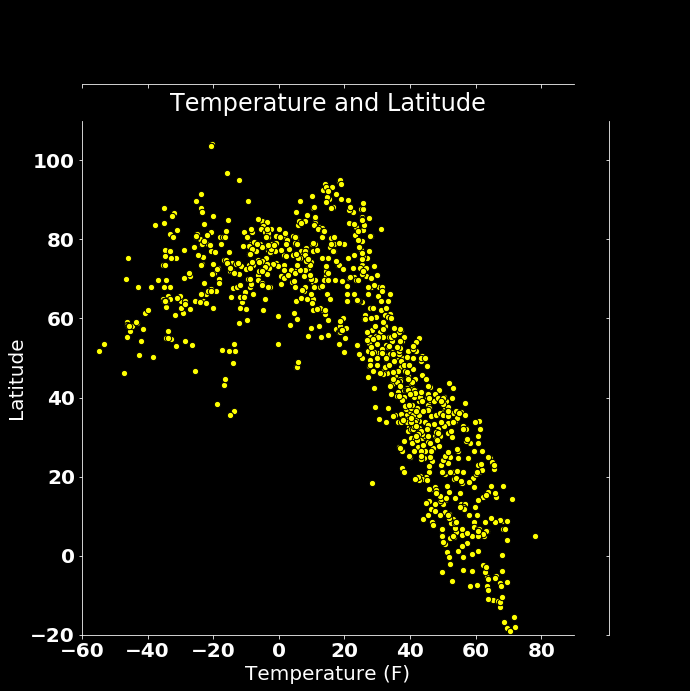

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['axes.titlepad'] = 10 
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)
plt.style.use('dark_background')
g = sns.JointGrid(y='temp_f', x='lat', data=df, size=10, ratio=5, space=.5,
                 ylim=(-20,110), xlim=(-60,90))
g.plot_joint(plt.scatter, color='yellow',s=40, edgecolor='black')
plt.title('Temperature and Latitude')
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.show()

## Humidity (%) vs. Latitude

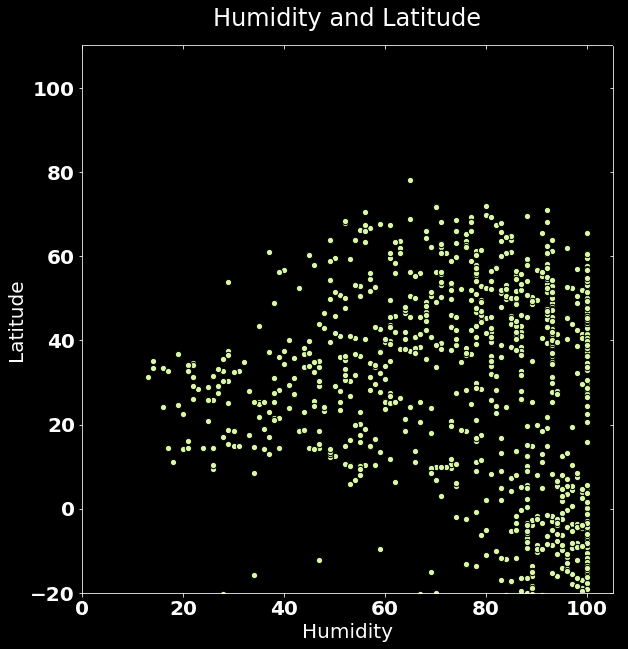

In [48]:

plt.style.use('dark_background')
rcParams['axes.titlepad'] = 20 
g = sns.JointGrid(x='humidity', y='lat', data=df, size=9, ratio=100)
g.plot_joint(plt.scatter, color='#DAF7A6',s=40, edgecolor='black')
plt.ylim(-20,110)
plt.xlim(0,105)
plt.title('Humidity and Latitude')
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

## Cloudiness (%) vs. Latitude

* in the more northerly regions of the world visibility goes up. 

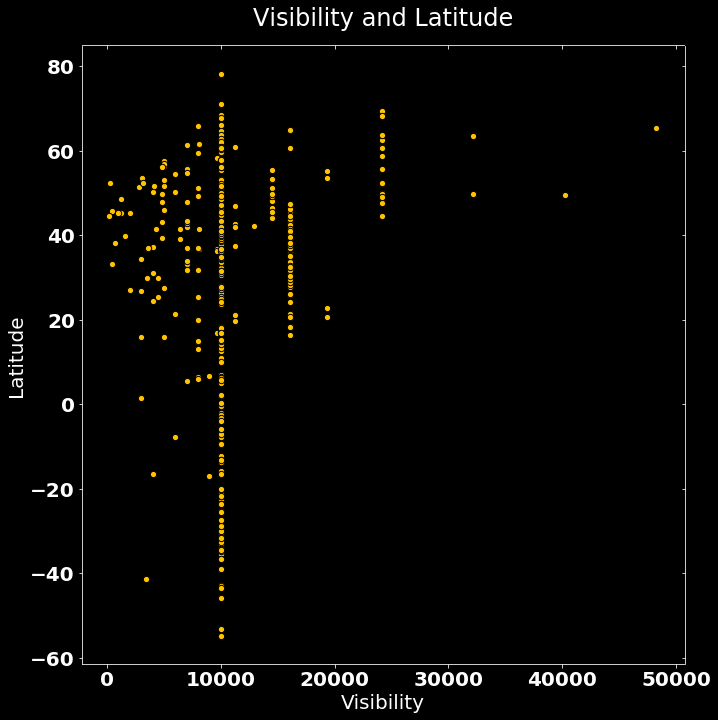

In [49]:

plt.style.use("dark_background")
g = sns.JointGrid(x='visibility', y='lat', data=df, size=10, ratio=100)
g.plot_joint(plt.scatter, color='#FFC300',s=40, edgecolor='black')
plt.title('Visibility and Latitude')
plt.xlabel("Visibility")
plt.ylabel("Latitude")
plt.show()

## Wind Speed (mph) vs. Latitude

* Generally we can see that around the equator wind speeds are lower

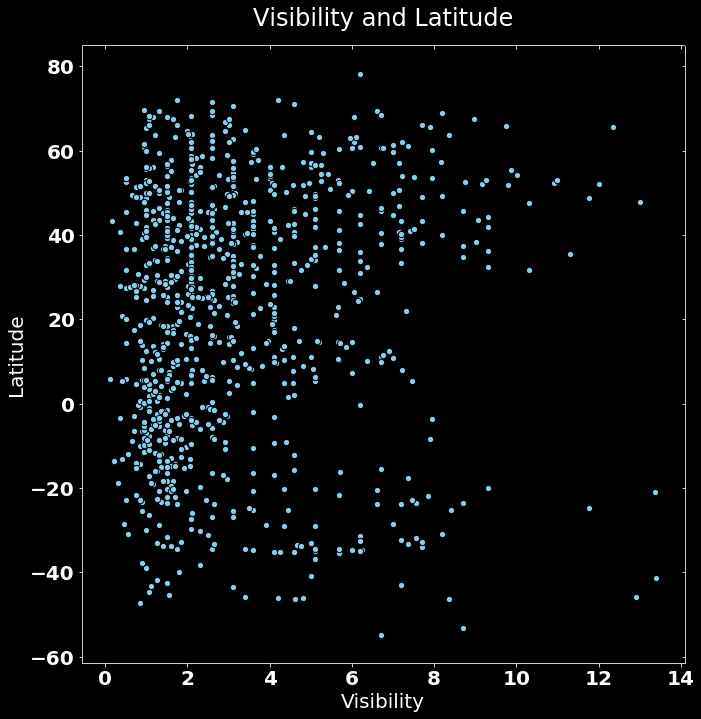

In [50]:

plt.style.use("dark_background")
g = sns.JointGrid(x='wind_speed', y='lat', data=df, size=10, ratio=100)
g.plot_joint(plt.scatter, color='skyblue',s=40, edgecolor='black')

plt.title('Visibility and Latitude')
plt.xlabel("Visibility")
plt.ylabel("Latitude")
plt.show()

## Frequent duplicate cities


* I used a random numbers generator to create lat, long values which were then fed into the citipy module. The citipy module will return the closest inhabited place of 500 and more, when given coordinates. If a city/town is more isolated, then it has a higher chance of being picked by the citipy module (given a uniform distribution of coordinates). Bellow is the top 10 locations most frequently returned locations by the citipy modules. Most of the towns are in nations from the southern hemisphere (Australia, New Zealand, South Africa, French Polynesia, Chile, Argentina) and coastal. 

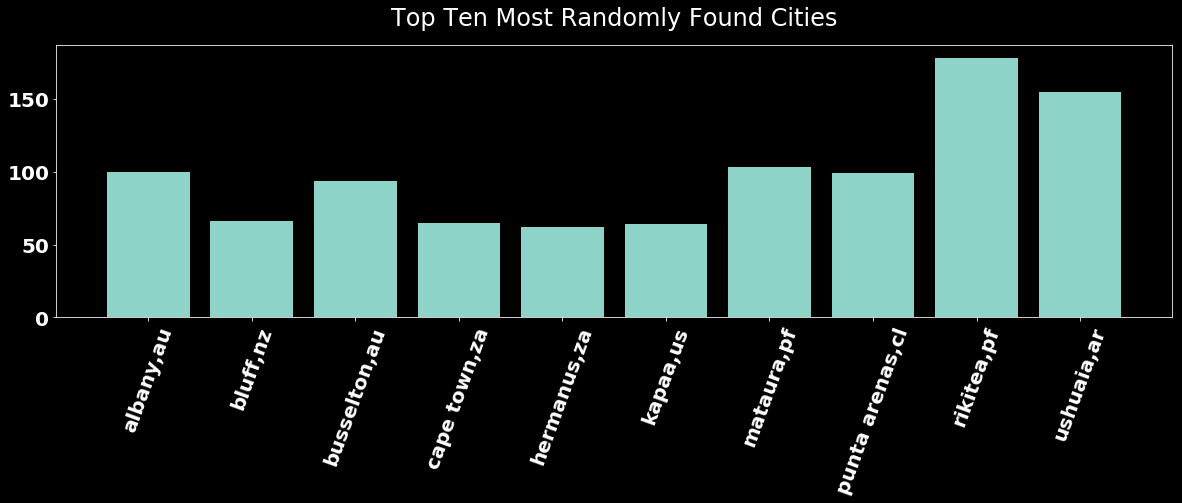

In [54]:
duplic = pd.Series(duplicate_cities).value_counts()[:10]
plt.rcParams["figure.figsize"] = (20,5)
plt.bar(duplic.index, duplic)
plt.xticks(rotation=70)
plt.title("Top Ten Most Randomly Found Cities")
plt.show()
#weatherless_cities